In [2]:
import numpy as np
import pandas as pd
import seaborn as sb

titanic_train = pd.read_csv("csv/train.csv")
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

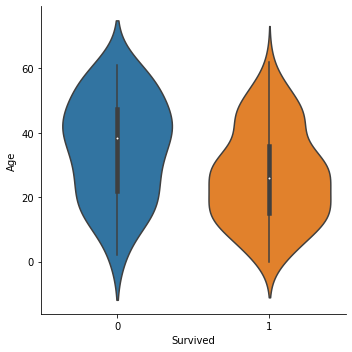

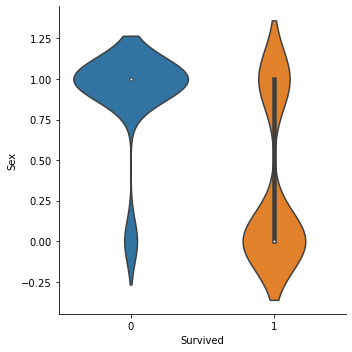

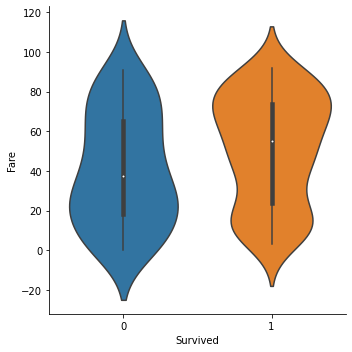

In [3]:
from sklearn.preprocessing import LabelEncoder
#TODO: maybe should not drop these null rows, instead set a mean value?
titanic_train.dropna(inplace=True)
titanic_train.isnull().sum()

titanic_train = titanic_train.apply(LabelEncoder().fit_transform)

sb.catplot(x="Survived",y="Age",kind="violin", data=titanic_train)
sb.catplot(x="Survived",y="Sex",kind="violin", data=titanic_train)
sb.catplot(x="Survived",y="Fare",kind="violin", data=titanic_train)

In [4]:
# array([[205,  55],
#        [ 68,  90]]) 0.7057416267942583
# ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
# array([[163,  97],
#        [ 52, 106]]) 0.6435406698564593
# ["Pclass","Name","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
# array([[162,  98],
#        [ 52, 106]]) 0.6411483253588517
# ["Pclass","Name","Sex","Age","SibSp","Parch","Fare","Embarked"]
# array([[135, 125],
#        [ 33, 125]]) 0.6220095693779905
# ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

# TODO: seems more input features, the accuracy gets better,
# even though the added input features seems not correlated with
# the 'Survive' feature(expect the manually added 'PassageId' feature
# which does not in the original data )
Selected_features = ["Pclass","Name","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
train_X = titanic_train[Selected_features]
train_y = titanic_train["Survived"]

In [5]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
titanic_test = pd.read_csv("csv/test.csv")

test_X = titanic_test.apply(LabelEncoder().fit_transform)
test_X = test_X[Selected_features]
predictions = model.predict(test_X)

fm_predictions = predictions.reshape(-1,1)


/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
test_y = pd.read_csv("csv/test_survived.csv")
test_y = test_y.drop(columns="PassengerId")

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predictions)


array([[205,  55],
       [ 68,  90]])

In [8]:
print(classification_report(test_y, predictions))
print('Accuracy: ', accuracy_score(test_y, predictions))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       260
           1       0.62      0.57      0.59       158

    accuracy                           0.71       418
   macro avg       0.69      0.68      0.68       418
weighted avg       0.70      0.71      0.70       418

Accuracy:  0.7057416267942583


In [9]:
#reconstruct the result as dataframe
# predictions_df = pd.DataFrame(columns=['Survived'], data=fm_predictions)
# raw_result = predictions_df.join(titanic_test, how='right')
# result = raw_result[["PassengerId","Survived"]]
#index=False, export without index column(which is generated automatically)
#result.to_csv("export_result.csv",index=False)

/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yp/anaconda3/envs/test2/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AUC score:0.741333982473223


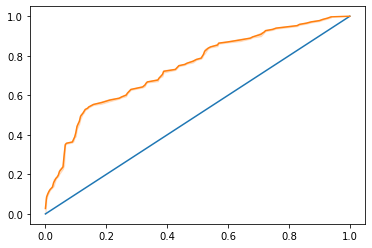

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(test_X)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_scores[:,1])
sb.lineplot([0, 1], [0, 1])
sb.lineplot(fpr, tpr)

auc = roc_auc_score(test_y, y_scores[:, 1])
print("AUC score:" + str(auc))